https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [1]:
import nltk
from nltk.tokenize import sent_tokenize

### In this tutorial, we are going to covers the following topics

1. Text Analytics and NLP
2. Compare Text Analytics, NLP and Text Mining
   1. Text Analysis Operations uusing NLTK
   2. Tokenization
   3. Stop words
   4. Lexicon Normalization such as Stemming and Lemmatization
   5. POS Tagging
3. Sentiment Analysis
4. Text classification
5. Performing sentiment Analysis using Text Classification

## 1. Text Analytics and NLP
## 2. Compare Text Alaytics, NLP and Text Mining

Text Mining: - 
    1. Text mining also referred to as text analytics
    2. Text mining is the process of exploring sizeable textual data        and find patterns.
    3. Finding frequency counts of words, length of the sentence,            presence/absence of specific words is known as text mining.

Natural language processing is one of the components of text mining. NLP helps identified sentiment, finding entities in the sentence, and category of blog/article. Text mining is preprocessed data for text analytics. In Text Analytics, statistical and machine learning algorithm used to classify information.

## 2. A. Text Analysis operations using NLTK

NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. NLTK helps the computer to analysis, preprocess, and understand the written text.

# 2. B Tokenization
Tokenization is the first step in the text analytics. The process of breaking down a text paragraph into smallar chunk such as words or sentence is called Tokenization. Token is single entitiy that is building blocks for sentence or paragraph. 

##  2.b.1 Sentence Tokenization

In [2]:
text = "Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard. he he he he he he"

In [3]:
tokenized_text = sent_tokenize (text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard.", 'he he he he he he']


## 2.b.2.  Word tokenization

In [4]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize (text)
print (tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.', 'he', 'he', 'he', 'he', 'he', 'he']


## 2.b.3. Frequency distribution

In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 26 samples and 37 outcomes>


In [6]:
fdist.most_common(2)

[('he', 6), ('is', 3)]

# Frequency distribution plot

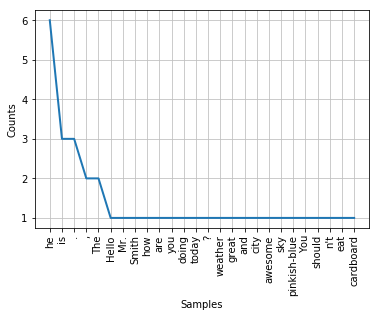

In [7]:
import matplotlib.pyplot as plt
fdist.plot(40, cumulative=False)
plt.show()

# C. Stopwords -- noise in the text
Stop words considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the etc. 
In NLTK for removing stopwords, you need to create a lists fo stop words and filter out your list of tokens from these words.

In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'was', 'why', 'over', 'off', 'won', 'so', 'myself', 's', "didn't", 'ain', 'just', "that'll", "you've", 'theirs', 'on', 'about', 'from', 'did', "hasn't", 'into', "couldn't", "shouldn't", 'during', 'an', 'does', 'ma', 'her', 'some', "needn't", 'm', 'through', 'his', "mustn't", 'again', 'yourself', 'further', 'between', 'at', 'herself', 'down', 'me', 'if', 'itself', 'not', 'most', 'by', 'under', 'were', 'because', 'but', 'will', 'of', 'both', 'or', "shan't", 'themselves', 'all', 'do', 'their', 'and', 'a', 'your', 'in', 't', 'my', 'while', 'wasn', 'is', "you'd", "won't", "you'll", 'this', 'the', 'after', 'o', 'yours', 'ours', "you're", 'what', 'himself', 'our', 'yourselves', 'up', 'mightn', 'against', 'to', 'each', "should've", 'mustn', 'that', 'wouldn', "wouldn't", 'i', "aren't", 'doing', "hadn't", 'now', 'am', "weren't", 'such', "mightn't", 'with', 'she', 'hers', 'he', 'being', 'than', 'are', 'nor', 'needn', 'out', 'you', 'where', 'other', 'haven', 'no', 'as', 'above', 'can', 'll', 'had

# Removing stopwords

In [9]:
tokenized_sent = tokenized_word
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.', 'he', 'he', 'he', 'he', 'he', 'he']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard', '.']


# D. Lexicon Normalization -- kind of noise in text

Lexicon normalization is the another type of the noise in the text. For example, connection, connected, connecting word reduce to common word connect. It reduces derivationally related forms of word to a common root word. 

# D1. Stemming
Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".


In [10]:
text

"Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard. he he he he he he"

In [13]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print()
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard', '.']

Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard', '.']


# D2. Lammatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transfroms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word with out knowledge of the context. 
## For example, the better has good as lemma
This thing is miss by stemming because it requires a dictionalry look-up. 

In [32]:
# Lexicon Normallization
# performing stemming and Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized word:", lem.lemmatize(word, "v"))
print("Stemmed word:", stem.stem(word))

nword = "connected"
print("Lemmatized word:", lem.lemmatize(nword, "v"))
print("Stemmed word:", stem.stem(nword))

Lemmatized word: fly
Stemmed word: fli
Lemmatized word: connect
Stemmed word: connect


# E. POS tagging (part-of-Speech) --> grammatical group of words

The primary target of Part-of-speech (POS) tagging to identify the grammatical group of given word, whether it is NOUN, PRONOUN, ADJECTIVE, verb, adverb etc based on the context. **POS tagging looks for relationships within the sentence and assign a corresponding  tag to word.**

In [34]:
sent= "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [35]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

# 3. Sentiment Analysis
### Sentiment Analysis arises from, 
1. Now a days, companey wants to understand what went wrong with their latest product, 
2. What users and general public think about the latest features
You can quantify such information with reasonable accuracy using sentiment analysis. 

**Quantifying users content, idea, belief, and opinion is known as sentiment analysis.**

Quantifying users content, idea, belief, and opinion is known as sentiment analysis. User's online post, blogs, tweets, feedback of product helps business people to the target audience and innovate in products and services. Sentiment analysis helps in understanding people in a better and more accurate way. It is not only limited to marketing, but it can also be utilized in politics, research, and security.

Human communication just not limited to words, it is more than words. Sentiments are combination words, tone, and writing style. As a data analyst, It is more important to understand our sentiments, what it really means?

There are mainly two approaches for performing sentiment analysis.

1. Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

2. Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

In this Tutorial, you will use the second approach(Machine learning based approach). This is how you learn sentiment and text classification with a single example.

# 4. Text classification
1. Text classification is important tasks of text mining.
2. Text classification is supervised approach.
3. Text classification identify catagory of class of given text such as blog, book, web page, new articles and tweets.
4. Text classification has various application in todays computer word such as spam detectation, task catagorization, 

![pic.png](attachment:pic.png)
You can insert the image in the Jupyter notebook itself. This way you don't need to keep the image separately in the folder.

Steps:

1. Convert the cell to markdown by:
2. Now go to menu bar and select Edit -> Insert Image.

3. Select image from your disk and upload.

4. Press Ctrl+Enter or Shift+Enter.

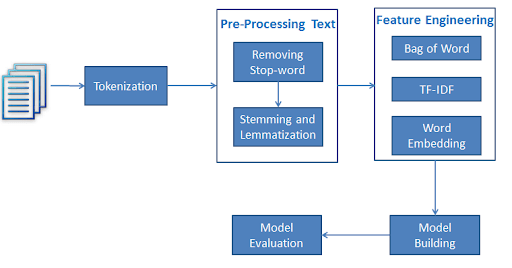

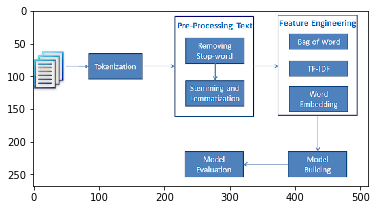

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("pic.png")
plt.imshow(image)
plt.show()

# 5. Performing Sentiment Analysis using Text Classification 

Till now, you have learned data pre-processing using NLTK. Now, you will learn **Text Classification**. You will perform Multi-Nomial Naive Bayes Classification using scikit-learn.

In the model the building part, you can use the **"Sentiment Analysis of Movie, Reviews" dataset available on Kaggle. Dataset has four columns PhraseId, SentenceId, Phrase, and Sentiment.**

The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
test.tsv contains just phrases. You must assign a sentiment label to each phrase.

This data has 5 sentiment labels:

- 0 - negative 
- 1 - somewhat negative 
- 2 - neutral 
- 3 - somewhat positive 
- 4 - positive

In [47]:
import pandas as pd
data = pd.read_csv('sentiment-analysis-on-movie-reviews/train.tsv', sep='\t')

In [55]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [50]:
data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [52]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of Review')

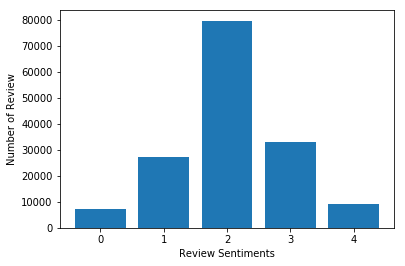

In [56]:
Sentiment_count = data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')

In [60]:
data_test = pd.read_csv('sentiment-analysis-on-movie-reviews/test.tsv', sep='\t')

In [61]:
data_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [62]:
data_test.describe()

,PhraseId,SentenceId
count,66292.00000,66292.000000
mean,189206.50000,10114.909144
std,19136.99636,966.787807
min,156061.00000,8545.000000
25%,172633.75000,9266.000000
50%,189206.50000,10086.000000
75%,205779.25000,10941.000000
max,222352.00000,11855.000000


https://towardsdatascience.com/heres-how-i-predicted-apple-s-stock-price-using-natural-language-processing-13a578c41b8e

## Here’s How I Predicted Apple’s Stock Price Using Natural Language Processing

NLP generally refers to the manupulation of natural languages, such as text, by softwere. Most common NLP application includes **speech reconginazation, chatbots, autocorrect, virtual assistants, and sentiment analysis**.
### for this project I am using sentiment analysis. 
Sentiment analysis refers to the intrepretation and classification of emotions within a text and allows for the identification of sentiment (or feeling) towards a particular things.
- Models which use sentiment analysis often focus on the polarity (the positivity or negativity) of text. 
- Sentiment analysis is particularly useful because it make sense out of unstructured data by efficiently processing huge amounts of data and automatically tagging it by polarity. 
- Therefore the process if sentiment analysis includes refinign a document and extracting keywords which will then be ranked by comparing these words to predefined lexicon containing polarities. 
- Stock price tomorrow = (Today price) + constants * (price today) * (sentiment today) 

https://algotrading101.com/learn/sentiment-analysis-python-guide/

## Sentiment analysis TSLA

In [15]:
import pandas as pd
df1 = pd.read_csv("./tsla-sentiment-analysis/tesla-headlines-sa.csv", encoding='windows-1250', header=None)
df = pd.read_csv("./tsla-sentiment-analysis/tesla-headlines-sa.csv", encoding='windows-1250')
new_df = df.rename(columns={'Title':'Tesla: Nothing Matters, Until Everything Matters','Date':'Montana Skeptic•Yesterday, 1:56 PM•600 Comments'})
new_df

,"Tesla: Nothing Matters, Until Everything Matters","Montana Skeptic•Yesterday, 1:56 PM•600 Comments"
0,Tesla: The Hype Does Not Reflect Reality,"The European View•Fri, Dec. 6•742 Comments"
1,Tesla Will Likely Achieve Record Deliveries In...,"iBEV•Wed, Dec. 4•340 Comments"
2,Tesla: Automatic Labeling For Computer Vision,"Trent Eady•Tue, Dec. 3•240 Comments"
3,Tesla: Ready To Re-Enter The Fast Lane,"DoctoRx•Tue, Dec. 3•229 Comments"
4,Tesla's Cybertruck Is Far From A Failure,"Long Term Tips•Mon, Dec. 2•450 Comments"
...,...,...
1149,Will GM Beat Tesla To Market For An Electric P...,"Anton Wahlman•Jan. 15, 2018•460 Comments"
1150,"Energy Storage Can Drive Future Tesla Growth, ...","Nick Cox•Jan. 15, 2018•466 Comments"
1151,Tesla: Cash Is King,"ValueAnalyst•Jan. 15, 2018•738 Comments"
1152,Tesla Bears Hang On,"ValueAnalyst•Jan. 11, 2018•483 Comments"


# Clean the data

# - 1. Feature Generation using Bag-of-Words

In text classification problem, we have a set of texts and their respective labels. But we directly cant use text for our model. You **need to convert these text into some numbers of vectors of numbers.**

**Bag-of-words (BoW) is the simplest way of extracting features from the text.**

**1.Bag-of-words converts text in to the matrix of occurance of words with in a document. This model concerns about whether given words occured or not in the document.** 

Example: There are three documents:

- Doc 1: I love dogs. 
- Doc 2: I hate dogs and knitting. 
- Doc 3: Knitting is my hobby and passion.

Now, you can create a matrix of document and words by counting the occurrence of words in the given document. This matrix is known as **Document-Term Matrix(DTM).**


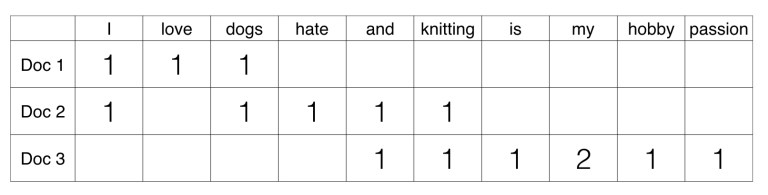

This matrix is using a single word. It can be a combination if two or more words, whcih is called a bigram or trigram model and general approach is called as n-gram model. 

we can create document term matrix by using scikit-learns CountVectorizer. 

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

# split train and test set

To understand model perfomance, dividing the dataset into training set and test set is a good strategy. 

Lets split dataset by using function **train_test_split()**. You need to pass basically 3 paramenters 
1. features
2. target and 
3. test_set size. 

Additionally, we can use random_state to select records randomly. 

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

# Model Building and Evaluation

Lets build the Text classification Model using TF-IDF. 

First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNL() function. 

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [66]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


Well, you got a classification rate of 60.49% using CountVector(or Bag-of-Words), which is not considered as good accuracy. We need to improve this.

# - 2. Feature generation using TF-IDF 

In **Term Frequency (TF)**, we just count the number of words occured in each documents. Then main issue with this Term Frequency (TF) is that it will give more weight to longer documents. Term frequecny is basically the output of Bag-of-Words(BOF). 

**IDF (Inverse Document Frequency)** measures the amount of information a given word provides across the documents. IDF is the logarithmatically scaled insverse ratio of number documents that contain the word and teh total number of documents. 

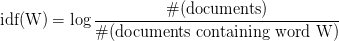

TF-IDF (Term Frequency- Inverse Documents Frequency) normalizes the documents term matrix. It is the product of TF and IDF. Word with the high tf-idf in a document, it is most of the times occured in given documents and must be absent in the other documents. So the word must be signatured word. 

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

# Split train and test set (TF-IDF)
Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

# Model Building and Evaluation (TF-IDF)

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


# Feedback

1. Nice overview of the Text analysis. Helped me in the capstone project.
2. 